In [1]:
import csv
import sys
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as dates
import datetime
import ipywidgets as widgets
from IPython.display import Image, display, HTML
from ipywidgets import interact, interact_manual


%matplotlib inline

In [2]:
# Q1 Minimum Core Tasks
csv_url = 'https://health-infobase.canada.ca/src/data/covidLive/covid19.csv'
req = requests.get(csv_url)
url_content = req.content
csv_file = open('covid19.csv', 'wb')

csv_file.write(url_content)
csv_file.close()

with open("covid19.csv","r") as file:
    reader = csv.reader(file)
    next(reader, None) #just to remove the header
    data=list(reader)

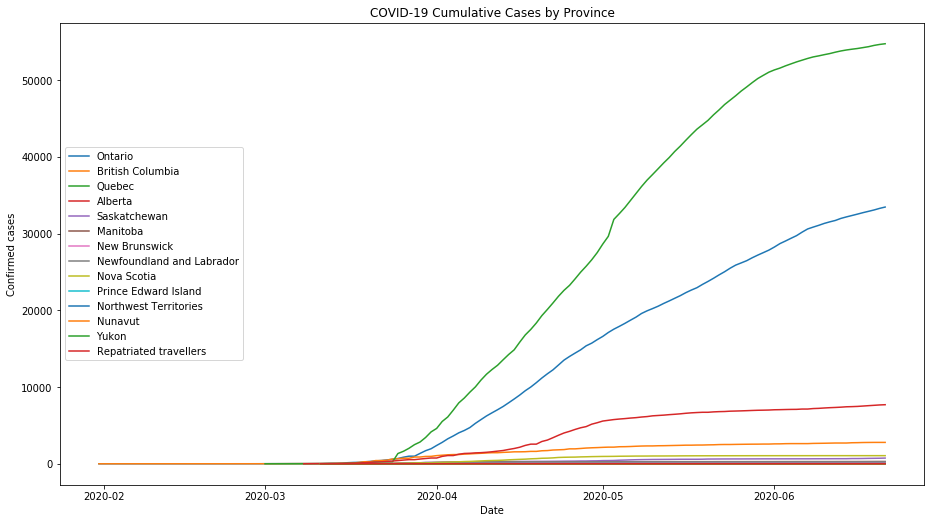

In [3]:
# Q2 Minimum Core Tasks
#get the uid of provinces and their names into a dictionary
uidNamePr = {}
for row in data:
    if row[0] not in uidNamePr.keys():
        uidNamePr[row[0]] = row[1]

#get data for each province
fig=plt.figure()
fig.set_size_inches(15.5, 8.5)
for prid in uidNamePr.keys():
    x_vec = []
    y_vec = []
    for row in data:        
        if row[0] == prid:   
            datetime_object = datetime.datetime.strptime(row[3], '%d-%m-%Y')
            x = dates.date2num(datetime_object)         
            x_vec.append(dates.num2date(x))#the date            
            y_vec.append(int(row[4]))#the totalCases     
    if prid != '1' : #remove canada from the list
        plt.plot_date(x_vec,y_vec,fmt="-", label=uidNamePr.get(prid),xdate=True, ydate=False)

plt.xlabel("Date")
plt.ylabel("Confirmed cases")
plt.title('COVID-19 Cumulative Cases by Province')
plt.legend(loc='center left') #bbox_to_anchor=(1, 0.5))
fig.savefig('Q2b.png', bbox_inches='tight')

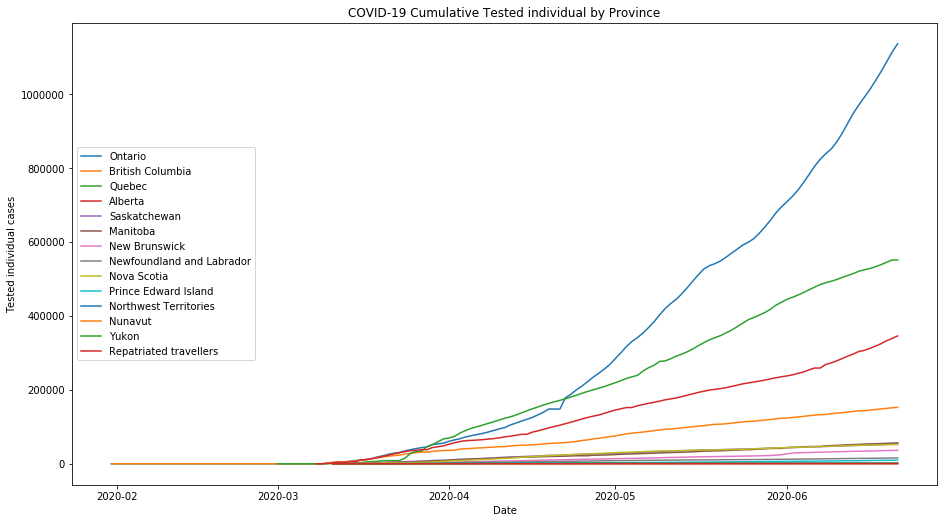

In [4]:
# Q3 Minimum Core Tasks
#get individual tested data (9th column[8]) for each province
fig=plt.figure()
fig.set_size_inches(15.5, 8.5)
for prid in uidNamePr.keys():
    x_vec = []
    y_vec = []
    for row in data:        
        if row[0] == prid:   
            datetime_object = datetime.datetime.strptime(row[3], '%d-%m-%Y')
            x = dates.date2num(datetime_object)         
            x_vec.append(dates.num2date(x))#the date
            test_ind = 0
            try:
                test_ind = int(row[8])
            except ValueError:
                test_ind = 0
            y_vec.append(test_ind)#the total test   
    if prid != '1' : #remove canada from the list
        plt.plot_date(x_vec,y_vec,fmt="-", label=uidNamePr.get(prid),xdate=True, ydate=False)

plt.xlabel("Date")
plt.ylabel("Tested individual cases")
plt.title('COVID-19 Cumulative Tested individual by Province')
plt.legend(loc='center left') #bbox_to_anchor=(1, 0.5))
fig.savefig('Q3.png', bbox_inches='tight')

In [5]:
# Q4 Minimum Core Tasks

In [6]:
# Create dataframe from the csv file and pre-process the data
covid_df = pd.read_csv('covid19.csv',header=0, parse_dates=['date'], dayfirst=True)
Q4_cols = ['pruid','prnameFR','numconf','numprob','numdeaths','numtotal','numtested','numrecover','percentrecover','ratetested','ratetotal','ratedeaths','deathstoday','percentdeath','testedtoday','recoveredtoday','percentactive','percentoday']
covid_df.drop(Q4_cols, axis = 1, inplace = True)
covid_df['Cut Off Date'] = '2020-03-23'
covid_df['Cut Off Date'] = pd.to_datetime(covid_df['Cut Off Date']).dt.date
covid_df['date'] = pd.to_datetime(covid_df['date']).dt.date
covid_df = covid_df[covid_df['date'] >= covid_df['Cut Off Date']]
#covid_df

In [7]:
# Create pivot dataframes for each province
alb_df = covid_df[covid_df.prname == 'Alberta'].pivot(index = 'date', columns = 'prname', values = 'numtoday').fillna(0)
bc_df = covid_df[covid_df.prname == 'British Columbia'].pivot(index = 'date', columns = 'prname', values = 'numtoday').fillna(0)
mani_df = covid_df[covid_df.prname == 'Manitoba'].pivot(index = 'date', columns = 'prname', values = 'numtoday').fillna(0)
nb_df = covid_df[covid_df.prname == 'New Brunswick'].pivot(index = 'date', columns = 'prname', values = 'numtoday').fillna(0)
nl_df = covid_df[covid_df.prname == 'Newfoundland and Labrador'].pivot(index = 'date', columns = 'prname', values = 'numtoday').fillna(0)
nt_df = covid_df[covid_df.prname == 'Northwest Territories'].pivot(index = 'date', columns = 'prname', values = 'numtoday').fillna(0)
ns_df = covid_df[covid_df.prname == 'Nova Scotia'].pivot(index = 'date', columns = 'prname', values = 'numtoday').fillna(0)
nun_df = covid_df[covid_df.prname == 'Nunavut'].pivot(index = 'date', columns = 'prname', values = 'numtoday').fillna(0)
on_df = covid_df[covid_df.prname == 'Ontario'].pivot(index = 'date', columns = 'prname', values = 'numtoday').fillna(0)
pei_df = covid_df[covid_df.prname == 'Prince Edward Island'].pivot(index = 'date', columns = 'prname', values = 'numtoday').fillna(0)
qb_df = covid_df[covid_df.prname == 'Quebec'].pivot(index = 'date', columns = 'prname', values = 'numtoday').fillna(0)
sk_df = covid_df[covid_df.prname == 'Saskatchewan'].pivot(index = 'date', columns = 'prname', values = 'numtoday').fillna(0)
yk_df = covid_df[covid_df.prname == 'Yukon'].pivot(index = 'date', columns = 'prname', values = 'numtoday').fillna(0)

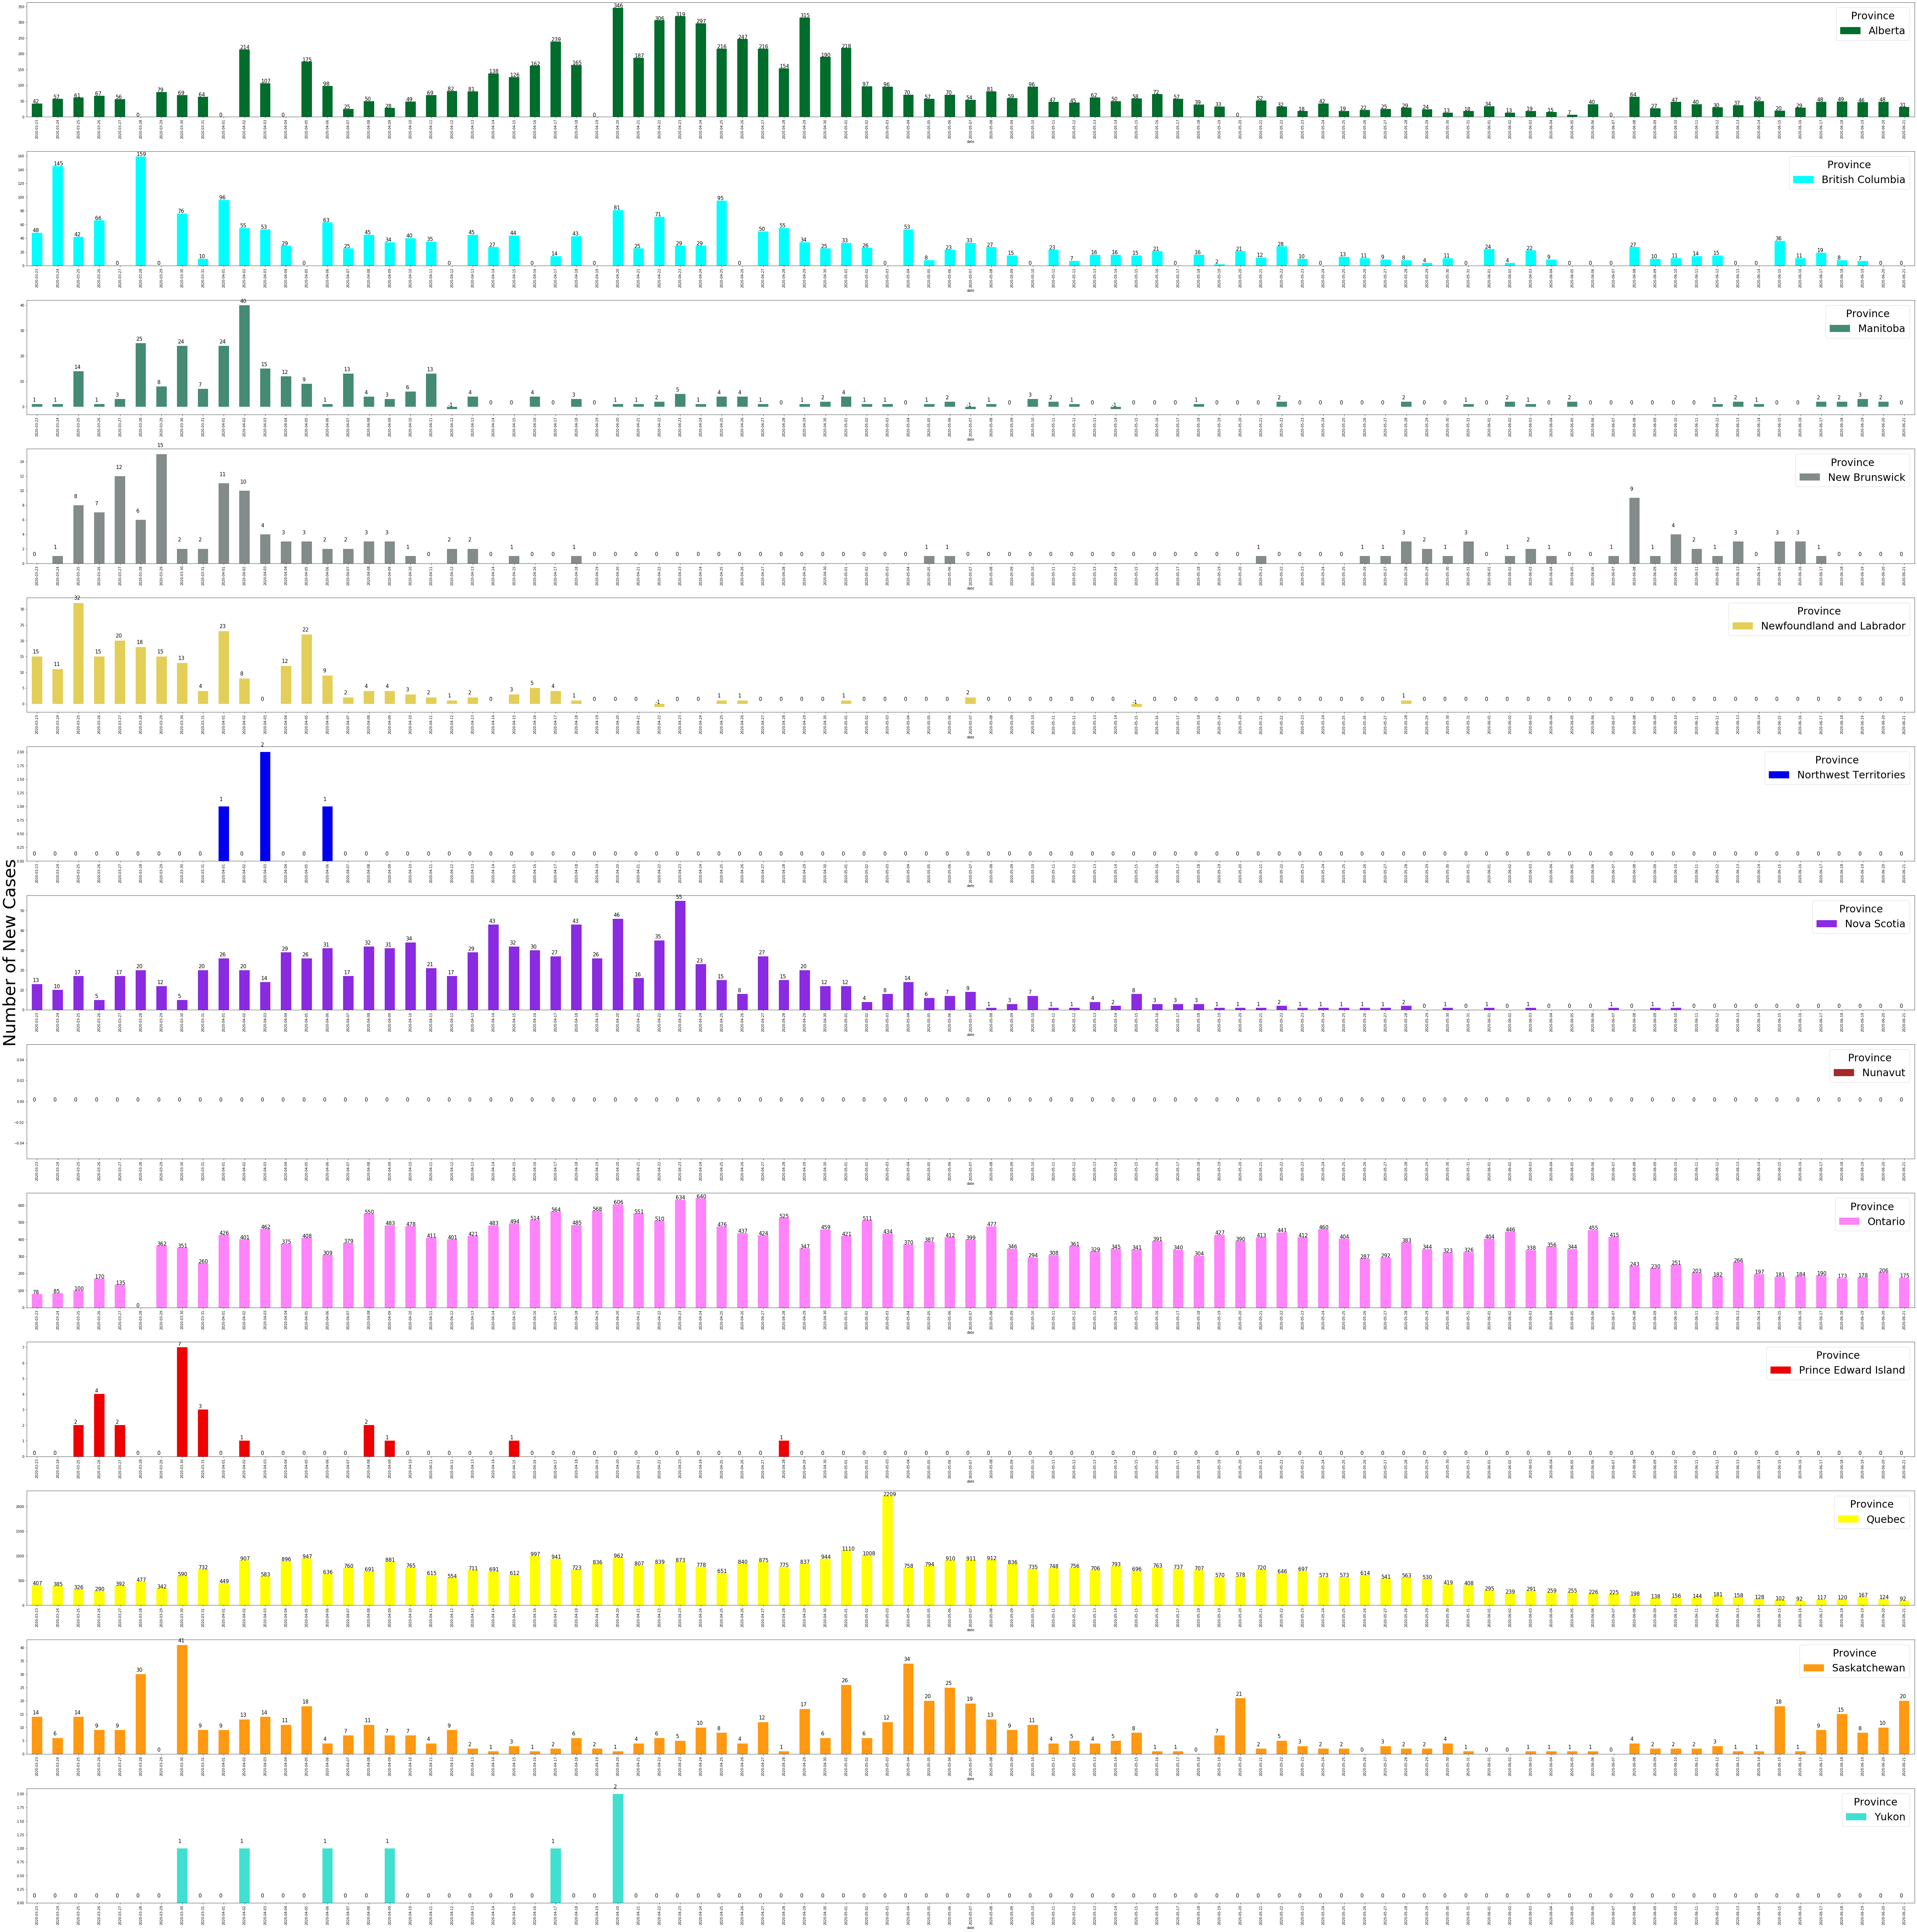

In [8]:
colors = ["#006D2C", "#00FFFF","#458B74","#838B8B","#E3CF57","#0000EE","#8A2BE2","#A52A2A","#FF83FA","#EE0000","#FFFF00","#FF9912","#40E0D0"]

# Create Subplots positions for all the provinces
fig = plt.figure()
fig.set_size_inches(100, 100)
ax1 = fig.add_subplot(13,1,1)
ax2 = fig.add_subplot(13,1,2)
ax3 = fig.add_subplot(13,1,3)
ax4 = fig.add_subplot(13,1,4)
ax5 = fig.add_subplot(13,1,5)
ax6 = fig.add_subplot(13,1,6)
ax7 = fig.add_subplot(13,1,7)
ax8 = fig.add_subplot(13,1,8)
ax9 = fig.add_subplot(13,1,9)
ax10 = fig.add_subplot(13,1,10)
ax11 = fig.add_subplot(13,1,11)
ax12 = fig.add_subplot(13,1,12)
ax13 = fig.add_subplot(13,1,13)

# Plot the pivot dataframes
alb_df.plot.bar(ax = ax1,grid = False,color = colors[0])
bc_df.plot.bar(ax = ax2,grid = False,color = colors[1])
mani_df.plot.bar(ax = ax3,grid = False,color = colors[2])
nb_df.plot.bar(ax = ax4,grid = False,color = colors[3])
nl_df.plot.bar(ax = ax5,grid = False,color = colors[4])
nt_df.plot.bar(ax = ax6,grid = False,color = colors[5])
ns_df.plot.bar(ax = ax7,grid = False,color = colors[6])
nun_df.plot.bar(ax = ax8,grid = False,color = colors[7])
on_df.plot.bar(ax = ax9,grid = False,color = colors[8])
pei_df.plot.bar(ax = ax10,grid = False,color = colors[9])
qb_df.plot.bar(ax = ax11,grid = False,color = colors[10])
sk_df.plot.bar(ax = ax12,grid = False,color = colors[11])
yk_df.plot.bar(ax = ax13,grid = False,color = colors[12])

# For each Subplot, calculate the height of the bars and write the value above each bars
for a in ax1.patches:
    ax1.text(a.get_x()+.04, a.get_height()+1, \
            str(round((a.get_height()), 2)), fontsize=15, color='black', rotation=0)
for b in ax2.patches:
    ax2.text(b.get_x()+.04, b.get_height()+1, \
            str(round((b.get_height()), 2)), fontsize=15, color='black', rotation=0)
for c in ax3.patches:
    ax3.text(c.get_x()+.04, c.get_height()+1, \
            str(round((c.get_height()), 2)), fontsize=15, color='black', rotation=0)
for d in ax4.patches:
    ax4.text(d.get_x()+.04, d.get_height()+1, \
            str(round((d.get_height()), 2)), fontsize=15, color='black', rotation=0)
for e in ax5.patches:
    ax5.text(e.get_x()+.04, e.get_height()+1, \
            str(round((e.get_height()), 2)), fontsize=15, color='black', rotation=0)
for f in ax6.patches:
    ax6.text(f.get_x()+.04, f.get_height()+0.1, \
            str(round((f.get_height()), 2)), fontsize=15, color='black', rotation=0)
for g in ax7.patches:
    ax7.text(g.get_x()+.04, g.get_height()+1, \
            str(round((g.get_height()), 2)), fontsize=15, color='black', rotation=0)
for h in ax8.patches:
    ax8.text(h.get_x()+.04, h.get_height(), \
            str(round((h.get_height()), 2)), fontsize=15, color='black', rotation=0)
for i in ax9.patches:
    ax9.text(i.get_x()+.04, i.get_height()+1, \
            str(round((i.get_height()), 2)), fontsize=15, color='black', rotation=0)
for j in ax10.patches:
    ax10.text(j.get_x()+.04, j.get_height()+0.1, \
            str(round((j.get_height()), 2)), fontsize=15, color='black', rotation=0)
for k in ax11.patches:
    ax11.text(k.get_x()+.04, k.get_height()+1, \
            str(round((k.get_height()), 2)), fontsize=15, color='black', rotation=0)
for l in ax12.patches:
    ax12.text(l.get_x()+.04, l.get_height()+1, \
            str(round((l.get_height()), 2)), fontsize=15, color='black', rotation=0)
for m in ax13.patches:
    ax13.text(m.get_x()+.04, m.get_height()+0.1, \
            str(round((m.get_height()), 2)), fontsize=15, color='black', rotation=0)
#fig.suptitle('Bar Plots Showing the Number of New Cases per Day',fontsize = 50, fontweight = 'bold', va = 'bottom')

ax1.legend(fontsize = 30, title = 'Province', title_fontsize=30 )
ax2.legend(fontsize = 30, title = 'Province', title_fontsize=30 )
ax3.legend(fontsize = 30, title = 'Province', title_fontsize=30 )
ax4.legend(fontsize = 30, title = 'Province', title_fontsize=30 )
ax5.legend(fontsize = 30, title = 'Province', title_fontsize=30 )
ax6.legend(fontsize = 30, title = 'Province', title_fontsize=30 )
ax7.legend(fontsize = 30, title = 'Province', title_fontsize=30 )
ax8.legend(fontsize = 30, title = 'Province', title_fontsize=30 )
ax9.legend(fontsize = 30, title = 'Province', title_fontsize=30 )
ax10.legend(fontsize = 30, title = 'Province', title_fontsize=30 )
ax11.legend(fontsize = 30, title = 'Province', title_fontsize=30 )
ax12.legend(fontsize = 30, title = 'Province', title_fontsize=30 )
ax13.legend(fontsize = 30, title = 'Province', title_fontsize=30 )

ax7.set_ylabel('Number of New Cases',fontsize = 50)
plt.subplots_adjust(bottom=0.1, hspace=0.3)
plt.savefig('Q4.png',bbox_inches='tight')

In [9]:
# Q5 Minimum Core Tasks

In [10]:
# Q6 Minimum Core Tasks

In [11]:
# Free Choice Task

In [12]:
# Create dataframe from the csv file and pre-process the data
df_covid = pd.read_csv('covid19.csv',header=0, parse_dates=['date'], dayfirst=True)
fct_cols = ['prnameFR','pruid','percentoday','percentrecover','ratetested','ratetotal','ratedeaths','deathstoday','percentdeath','percentactive']
df_covid.drop(fct_cols, axis = 1, inplace = True)
df_covid['date'] = pd.to_datetime(df_covid['date']).dt.date
df_covid = df_covid[df_covid.prname != 'Canada'] 
df_covid = df_covid[df_covid.prname != 'Repatriated travellers']
freechoice_df = df_covid.rename(columns = {"prname":"Province","numconf":"No. of Confirmed Cases","date":"Date","numprob":"No. of Probable Cases","numdeaths":"No. of Deaths","numtotal":"Total No. of Cases","numtested":"No. of People Tested","numrecover":"No. of People Recovered","numtoday":"No. of Cases Per Day","testedtoday":"No. of People Tested Per Day","recoveredtoday":"No. of People Recovered Per Day"})
freechoice_df = freechoice_df.set_index('Date')
freechoice_df = freechoice_df.fillna(0)
freechoice_df['No. of Deaths'] = freechoice_df['No. of Deaths'].astype('int64')
freechoice_df['No. of People Tested'] = freechoice_df['No. of People Tested'].astype('int64')
freechoice_df['No. of People Recovered'] = freechoice_df['No. of People Recovered'].astype('int64')
freechoice_df['No. of People Tested Per Day'] = freechoice_df['No. of People Tested Per Day'].astype('int64')
freechoice_df['No. of People Recovered Per Day'] = freechoice_df['No. of People Recovered Per Day'].astype('int64')
#freechoice_df

In [13]:
# Create the widgets and set their values
column= widgets.Dropdown(options=list(freechoice_df.select_dtypes('number').columns),description='Y - axis')
date1 = widgets.DatePicker(value=freechoice_df.index.min(),description='From')
date2 = widgets.DatePicker(value=freechoice_df.index.max(),description='To')

ui = widgets.HBox([column, date1, date2]) # Widgets Layout

def plot_up_to(column, date1,date2):
    """Function that creates a dataframe that contains 
    the values selected on the widgets and plots the dataframe"""
    fig = plt.figure()
    fig.set_size_inches(20, 10)
    From_date = pd.Timestamp(date1)
    To_date = pd.Timestamp(date2)
    plot_df = freechoice_df.loc[(freechoice_df.index >= From_date) & (freechoice_df.index <= To_date)]
    plot_df = plot_df.groupby('Province')
    plot_df[column].plot(marker = '.',legend = 'reverse',fontsize = 10) 
    plt.title('Interactive Plot Showing the Use of Widgets', fontsize = 30, color = 'blue')
    plt.ylabel(column,fontsize = 30, color = 'blue')
    plt.xticks(rotation=90)
    plt.xlabel('Date', fontsize = 30, color = 'blue') 

out = widgets.interactive_output(plot_up_to, {'column': column, 'date1': date1, 'date2': date2})

display(ui, out)

Output()

In [ ]:
data=pd.read_csv('cases.dat')
data_death=pd.read_csv('deaths.dat')

In [ ]:
#define columns
data.columns=['Province','Date','DoublingRate']
data_death.columns=['Province','Date','DoublingRate']
#remove duplicates
names_pr=data.Province.unique() 

#remove negative values that ocurred from testing errors
data = data.loc[data['DoublingRate'] >= 0] #remove negative values
data_death = data_death.loc[data_death['DoublingRate'] >= 0]

In [ ]:
#remove year from date- better for plotting
data['Date'] = data['Date'].str.replace('-2020','') 
data_death['Date'] = data_death['Date'].str.replace('-2020','')

colors = ["#006D2C", "#00FFFF","#458B74","#838B8B","#E3CF57","#0000EE","#8A2BE2","#A52A2A","#FF83FA","#EE0000","#FFFF00","#FF9912","#40E0D0"]


def plot_each_prov_cases(data): 
    """  Given data frame as input, plots the data for each province and saves figures under separate names. Note that this is ideally for COVID cases, due to how the images will be saved. """
    j=0
    i=0
    for i in names_pr[1:]: 
        subset=data.loc[data.Province==i] #subset of data frame for that province
        if subset.empty:
            continue
        a=subset.plot(kind='bar',x='Date',y='DoublingRate', label=i,color=colors[j], figsize=(10,5))
        j=j+1
        title='q6cases'+i+'.png' #save files under different names
        a.legend(fontsize=24)
        a.figure.savefig(title)
        a.autoscale(enable=True)


plot_each_prov_cases(data)

In [ ]:
#data for canada- cases (want title here)
subset=data.loc[data.Province=='Canada '] 
ax=subset.plot(kind='bar',x='Date',y='DoublingRate', label=names_pr[0], figsize=(10,5), title="Doubling Rate in Canada- Cases")
ax.autoscale(enable=True)
ax.legend(fontsize=24)
plt.savefig('q6_bar_can.png')


In [ ]:
#data for canada - deaths (want title)
subset=data_death.loc[data_death.Province=='Canada '] #subset of data frame
ax1=subset.plot(kind='bar',x='Date',y='DoublingRate', label=names_pr[0], figsize=(10,5), title="Doubling Rate in Canada- Deaths")
ax1.autoscale(enable=True)
ax1.legend(fontsize=24)
plt.savefig('q6_bar_can_death.png')

In [ ]:
def plot_each_prov_deaths(data): 
    j=0
    i=0
    ''' Given data frame as input, plots the data for each province and saves figures under seaprate names. Same idea as plot_each_prov_cases, but files will be saved under different names.'''
    for i in names_pr[1:]: #each province
        subset=data.loc[data.Province==i] #subset of data frame (data for each province) 
        if subset.empty:
            continue
        a=subset.plot(kind='bar',x='Date',y='DoublingRate', label=i,color=colors[j], figsize=(10,5))
        j=j+1
        title='q6deaths'+i+'.png' #save files under different names
        a.legend(fontsize=24)
        a.figure.savefig(title)
        a.autoscale(enable=True)


plot_each_prov_deaths(data_death)